In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn import decomposition

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import re

In [116]:
# Reading Data set
data = pd.read_csv('zomato.csv')

In [117]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Splitting Data for K-Means

In [118]:
res = re.split('[(),]', data['reviews_list'].iloc[0])

In [119]:
Kmeans_data = []
data_rate_avg = []
for j in range(len(data)):
    data_point = data['reviews_list'].iloc[j]
    res = re.split('[(),]', data_point)
    num = []
    #print(res)
    for i in res:
        
        if "Rated" in i:
            #print(i)
            #temp = list(i)
            try:
                num.append(float(i[-4:-1]))
            except:
                pass
    Kmeans_data.extend(num)
    data_rate_avg.append(np.mean(num))

c:\users\shailly\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\shailly\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [120]:
print(len(data),len(data_rate_avg),len(Kmeans_data))

51717 51717 1319968


In [121]:
# Add new column in zomato data set
data['Average emotion of review'] = np.array(data_rate_avg)

In [122]:
# Train K-means model
from sklearn.cluster import KMeans

Kmeans_data = np.array(Kmeans_data)

Kmeans_data = Kmeans_data[np.logical_not(np.isnan(Kmeans_data))]


kmeans = KMeans(n_clusters=2, random_state=0).fit(np.reshape(Kmeans_data,(-1,1)))

### Cleaning Data

In [123]:
#Dropping irrelevant columns
df = data.drop(['url', 'phone', 'address', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city),Average emotion of review
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari,4.083333
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari,3.571429
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari,3.150000
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari,3.671429
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari,4.000000


In [124]:
#New dataframe with renamed columns
df1 = df.rename(columns = {'approx_cost(for two people)' : 'Cost_for_2', 'listed_in(type)' : 'Category', 'listed_in(city)' : 'Area', 'name' : 'Restaurant_Name', 
                           'online_order' : 'Online_Order', 'book_table' : 'Table_Booking', 'rate' : 'Ratings', 'votes' : 'Votes', 'location': 'Location', 
                           'rest_type' : 'Type', 'menu_item' : 'Menu_Item', 'cuisines' : 'Cuisines'})
df1.head()

,Restaurant_Name,Online_Order,Table_Booking,Ratings,Votes,Location,Type,Cuisines,Cost_for_2,Menu_Item,Category,Area,Average emotion of review
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari,4.083333
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari,3.571429
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari,3.150000
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari,3.671429
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari,4.000000


In [125]:
#Number of NaN values in each column
df1.isna().sum()

Restaurant_Name                 0
Online_Order                    0
Table_Booking                   0
Ratings                      7775
Votes                           0
Location                       21
Type                          227
Cuisines                       45
Cost_for_2                    346
Menu_Item                       0
Category                        0
Area                            0
Average emotion of review    7595
dtype: int64

In [126]:
#Number of duplicates in dataframe
df1.duplicated().sum()

63

In [127]:
#Dropping duplicate values
df1.drop_duplicates(inplace=True)

In [128]:
#Dropping NaN values
df1.dropna(how='any',inplace=True)

In [129]:
print("Number of duplicates :")
print(df1.duplicated().sum())
print("\nNumber of NaN :\n")
print(df1.isnull().sum())

Number of duplicates :
0

Number of NaN :

Restaurant_Name              0
Online_Order                 0
Table_Booking                0
Ratings                      0
Votes                        0
Location                     0
Type                         0
Cuisines                     0
Cost_for_2                   0
Menu_Item                    0
Category                     0
Area                         0
Average emotion of review    0
dtype: int64


In [130]:
df1['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '2.9 /5', '3.3 /5', '2.8 /5', '-', '3.5 /5',
       '2.7 /5', '3.2 /5', '3.1 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '2.5 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [131]:
df1['Ratings'].size

41184

In [132]:
# Print the size of each columns
temp_disp = pd.DataFrame()
temp_disp['Columns'] = list(df1.columns)
size_list = []
for i in list(df1.columns):
    size_list.append(df1[i].size)
temp_disp['Size'] = size_list
temp_disp.head(10)

,Columns,Size
0,Restaurant_Name,41184
1,Online_Order,41184
2,Table_Booking,41184
3,Ratings,41184
4,Votes,41184
5,Location,41184
6,Type,41184
7,Cuisines,41184
8,Cost_for_2,41184
9,Menu_Item,41184


In [133]:
# Create new data set after removing garbage values
df2 = df1.loc[df1.Ratings != 'NEW']

In [134]:
df2['Ratings'].size

40138

In [135]:
# Print size of columns in new data set (df2)
temp_disp = pd.DataFrame()
temp_disp['Columns'] = list(df2.columns)
size_list = []
for i in list(df2.columns):
    size_list.append(df2[i].size)
temp_disp['Size'] = size_list
temp_disp.head(10)

,Columns,Size
0,Restaurant_Name,40138
1,Online_Order,40138
2,Table_Booking,40138
3,Ratings,40138
4,Votes,40138
5,Location,40138
6,Type,40138
7,Cuisines,40138
8,Cost_for_2,40138
9,Menu_Item,40138


In [136]:
df2['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '2.9 /5', '3.3 /5', '2.8 /5', '-', '3.5 /5', '2.7 /5',
       '3.2 /5', '3.1 /5', '2.6 /5', '4.5 /5', '4.3 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5', '2.5 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [137]:
df2 = df2.loc[df2.Ratings != '-']

In [138]:
df2['Ratings'].size

40116

In [139]:
temp_disp = pd.DataFrame()
temp_disp['Columns'] = list(df2.columns)
size_list = []
for i in list(df2.columns):
    size_list.append(df2[i].size)
temp_disp['Size'] = size_list
temp_disp.head(10)

,Columns,Size
0,Restaurant_Name,40116
1,Online_Order,40116
2,Table_Booking,40116
3,Ratings,40116
4,Votes,40116
5,Location,40116
6,Type,40116
7,Cuisines,40116
8,Cost_for_2,40116
9,Menu_Item,40116


In [140]:
# Replace '/5' by ',' in Rating Column
df2['Ratings'] = df2['Ratings'].apply(lambda l: l.replace('/5','')).astype(float)

In [141]:
df2['Ratings'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [142]:
df2['Cost_for_2'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '1,400', '2,000', '1,800', '1,900', '180',
       '330', '2,500', '2,200', '2,100', '3,000', '2,800', '3,400', '50',
       '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120', '5,000',
       '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [143]:
#Cost column has string values with some values having a comma such as '1,000'
df2['Cost_for_2'] = df1['Cost_for_2'].apply(lambda l: l.replace(',','')).astype(float)

In [144]:
# Print data types of column
df2.dtypes

Restaurant_Name               object
Online_Order                  object
Table_Booking                 object
Ratings                      float64
Votes                          int64
Location                      object
Type                          object
Cuisines                      object
Cost_for_2                   float64
Menu_Item                     object
Category                      object
Area                          object
Average emotion of review    float64
dtype: object

In [145]:
df2['Average emotion of review'].head()

0    4.083333
1    3.571429
2    3.150000
3    3.671429
4    4.000000
Name: Average emotion of review, dtype: float64

In [146]:
df2['Cost_for_2'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 1400., 2000., 1800., 1900.,  180.,  330., 2500.,
       2200., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450., 3200.,  240., 6000., 1050., 2300.,
       4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

In [147]:
df2.columns

Index(['Restaurant_Name', 'Online_Order', 'Table_Booking', 'Ratings', 'Votes',
       'Location', 'Type', 'Cuisines', 'Cost_for_2', 'Menu_Item', 'Category',
       'Area', 'Average emotion of review'],
      dtype='object')

In [148]:
df2.head()

,Restaurant_Name,Online_Order,Table_Booking,Ratings,Votes,Location,Type,Cuisines,Cost_for_2,Menu_Item,Category,Area,Average emotion of review
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,4.083333
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,3.571429
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari,3.150000
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet,Banashankari,3.671429
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet,Banashankari,4.000000


In [149]:
# Online_Order column has Yes/No String and convert into 1/0 String
df2['Online_Order'] = df2['Online_Order'].apply(lambda x: x.replace('Yes', '1'))
df2['Online_Order'] = df2['Online_Order'].apply(lambda x: x.replace('No', '0'))

In [150]:
# Convert string into number
df2.Online_Order = pd.to_numeric(df2.Online_Order)

In [151]:
# Table_Booking column has Yes/No String and convert into 1/0 String
df2['Table_Booking'] = df2['Table_Booking'].apply(lambda x: x.replace('Yes', '1'))
df2['Table_Booking'] = df2['Table_Booking'].apply(lambda x: x.replace('No', '0'))

In [152]:
# Convert string into number
df2.Table_Booking = pd.to_numeric(df2.Table_Booking)

In [153]:
temp_disp = pd.DataFrame()
temp_disp['Columns'] = list(df2.columns)
size_list = []
for i in list(df2.columns):
    size_list.append(df2[i].size)
temp_disp['Size'] = size_list
temp_disp.head(10)

,Columns,Size
0,Restaurant_Name,40116
1,Online_Order,40116
2,Table_Booking,40116
3,Ratings,40116
4,Votes,40116
5,Location,40116
6,Type,40116
7,Cuisines,40116
8,Cost_for_2,40116
9,Menu_Item,40116


### Restaurant Types Vs Rating

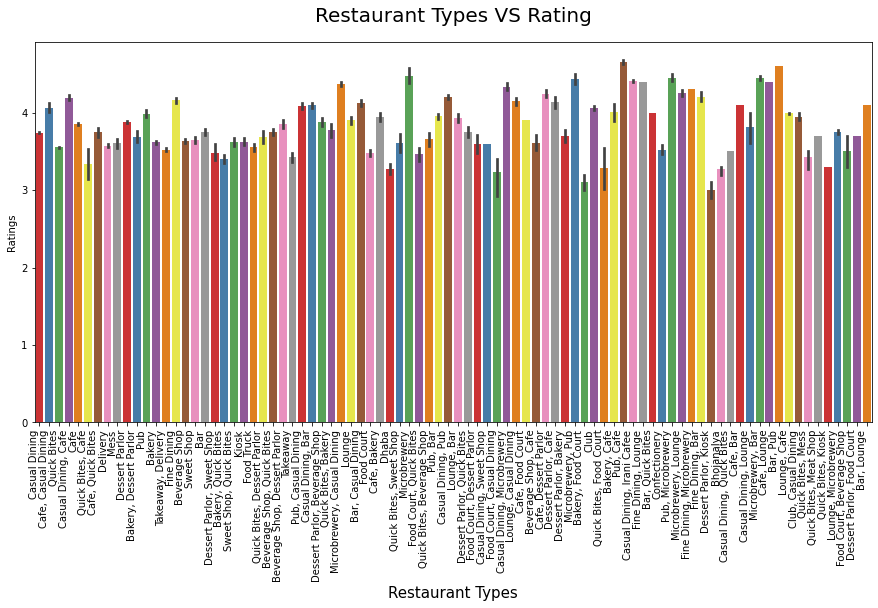

In [154]:
plt.figure(figsize=(15,7))
rest =sns.barplot(x=df2['Type'],y=df2['Ratings'],palette='Set1')
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.title("Restaurant Types VS Rating",size=20,pad=20)
rest
plt.xlabel("Restaurant Types",size=15)
plt.show()

### Restaurant Rating Distribution

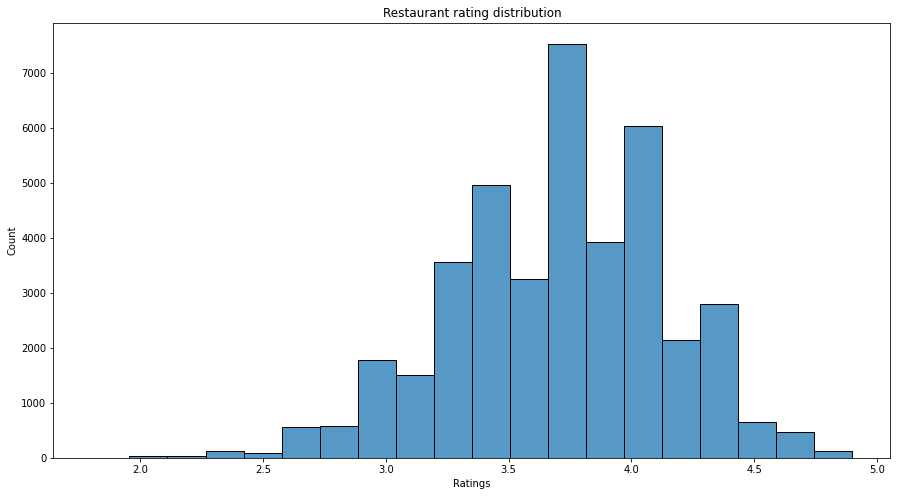

In [236]:
plt.figure(figsize=(15,8))
sns.histplot(df2['Ratings'], bins=20)
plt.title('Restaurant rating distribution')
plt.show()

### Restaurant Location Vs Rating

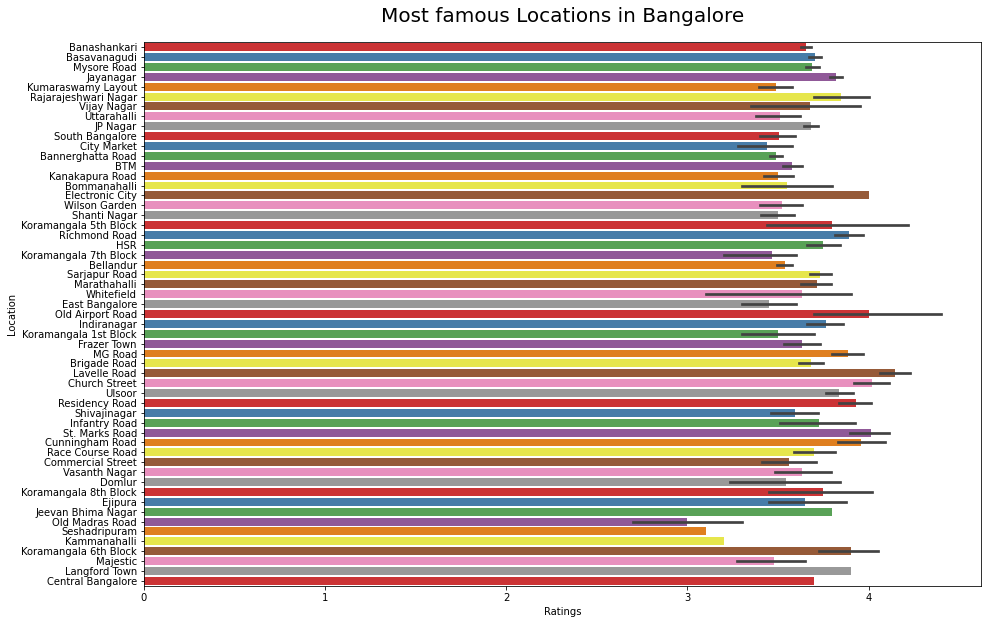

In [157]:
plt.figure(figsize=(15,10))
rest =sns.barplot(y=df2['Location'].iloc[:5000],x=df2['Ratings'].iloc[:5000],palette='Set1')
plt.title("Most famous Locations in Bangalore",size=20,pad=20)
rest
plt.show()

### Restaurant Location VS Restaurant Count

Text(0.5, 1.0, 'Restaurant types')

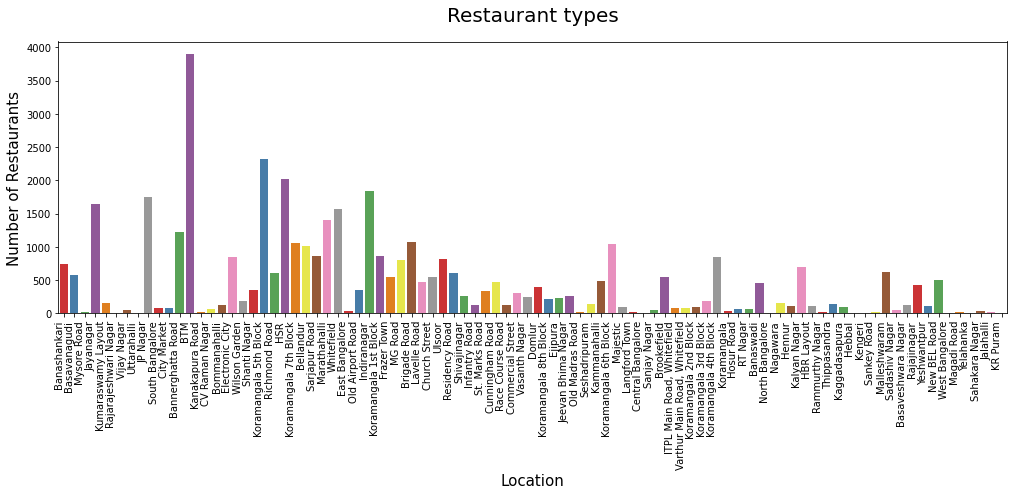

In [158]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="Location",data=df1, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Number of Restaurants",size=15)
plt.xlabel("Location",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)
plt.show()

### Online Order Vs Rating

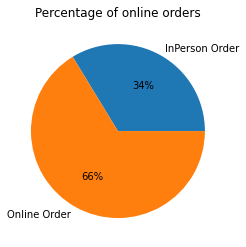

In [159]:
OrderTypeCount=df1['Online_Order'].value_counts().sort_values(ascending=True)
label=['InPerson Order','Online Order']
plt.pie(OrderTypeCount,labels=label,autopct='%1.0f%%')
plt.title('Percentage of online orders')
plt.show()

### Table Order Vs Rating

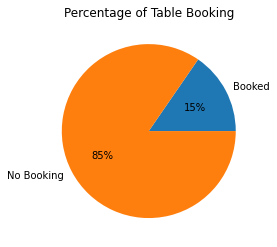

In [160]:
OrderTypeCount=df1['Table_Booking'].value_counts().sort_values(ascending=True)
label=['Booked','No Booking']
plt.pie(OrderTypeCount,labels=label,autopct='%1.0f%%')
plt.title('Percentage of Table Booking')
plt.show()

### Most Famous Restaurant Chains

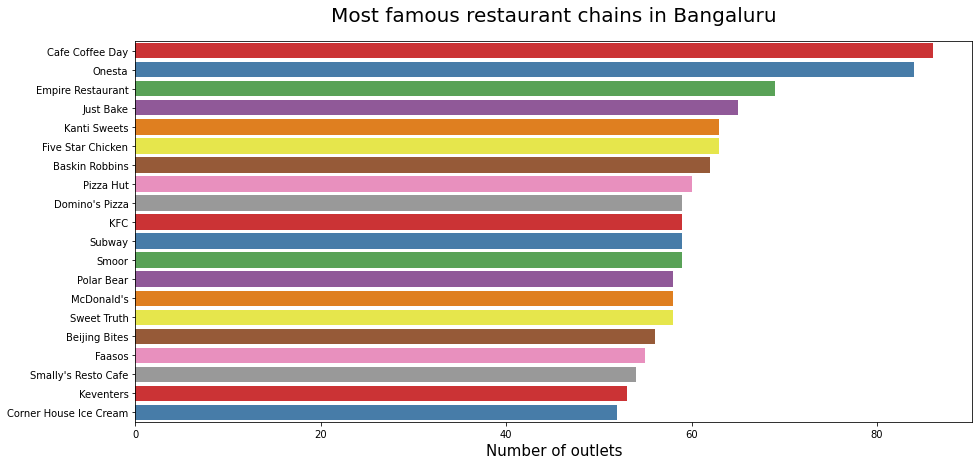

In [161]:
plt.figure(figsize=(15,7))
chains=df2['Restaurant_Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.show()

In [162]:
enc = LabelEncoder()

In [163]:
df2.head()

,Restaurant_Name,Online_Order,Table_Booking,Ratings,Votes,Location,Type,Cuisines,Cost_for_2,Menu_Item,Category,Area,Average emotion of review
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari,4.083333
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari,3.571429
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari,3.150000
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet,Banashankari,3.671429
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet,Banashankari,4.000000


In [164]:
temp_disp = pd.DataFrame()
temp_disp['Columns'] = list(df2.columns)
size_list = []
for i in list(df2.columns):
    size_list.append(df2[i].size)
temp_disp['Size'] = size_list
temp_disp.head(10)

,Columns,Size
0,Restaurant_Name,40116
1,Online_Order,40116
2,Table_Booking,40116
3,Ratings,40116
4,Votes,40116
5,Location,40116
6,Type,40116
7,Cuisines,40116
8,Cost_for_2,40116
9,Menu_Item,40116


In [165]:
# Encode the string values of below columns
df2.Location = enc.fit_transform(df2.Location)
df2.Menu_Item = enc.fit_transform(df2.Menu_Item)
df2.Cuisines = enc.fit_transform(df2.Cuisines)
df2.Category = enc.fit_transform(df2.Category)
df2.Type = enc.fit_transform(df2.Type)
df2.Area = enc.fit_transform(df2.Area)

In [166]:
df2.head()

,Restaurant_Name,Online_Order,Table_Booking,Ratings,Votes,Location,Type,Cuisines,Cost_for_2,Menu_Item,Category,Area,Average emotion of review
0,Jalsa,1,1,4.1,775,1,23,1871,800.0,8160,0,1,4.083333
1,Spice Elephant,1,0,4.1,787,1,23,807,800.0,8160,0,1,3.571429
2,San Churro Cafe,1,0,3.8,918,1,18,647,800.0,8160,0,1,3.150000
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,72,2187,300.0,8160,0,1,3.671429
4,Grand Village,0,0,3.8,166,4,23,1898,600.0,8160,0,1,4.000000


<AxesSubplot:>

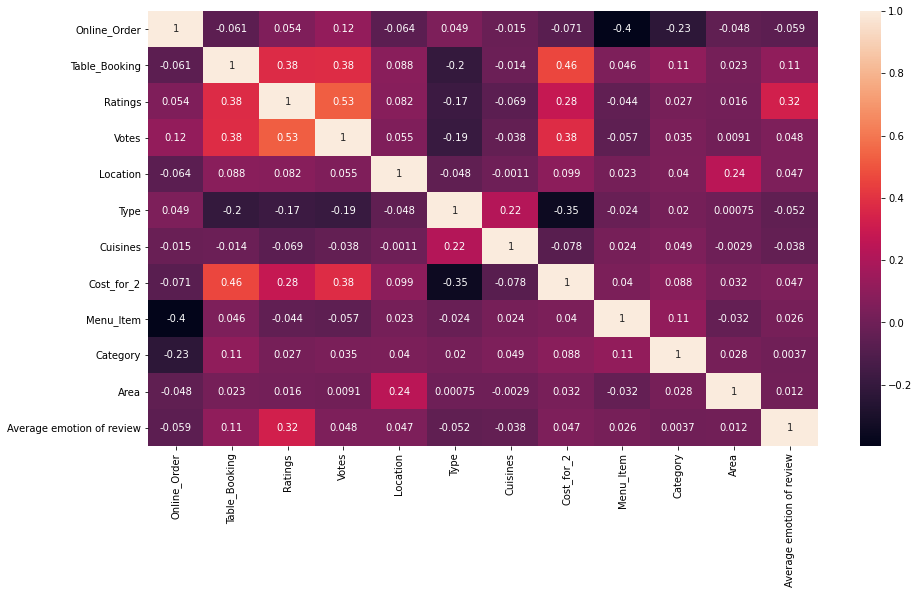

In [167]:
#Finding correlations
c = df2.corr(method = 'kendall')
plt.figure(figsize=(15,8))
sns.heatmap(c, annot=True)
plt.show()

#### Restaurant Types Vs Votes

Text(0.5, 1.0, 'Restaurant types')

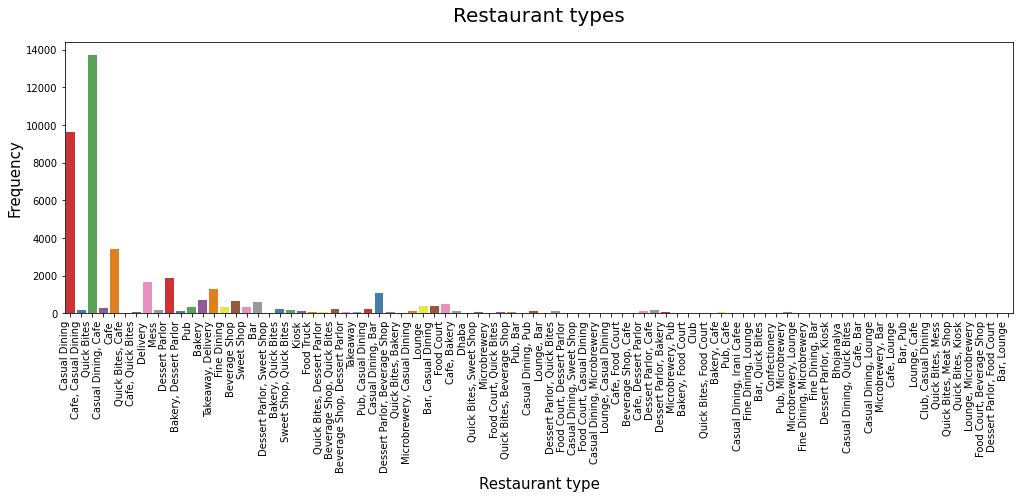

In [168]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="Type",data=df1, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)
pltshow()

In [169]:
data = df2.iloc[:,1:11]

In [170]:
# Store data into csv file
data.to_csv('Project_Dataset.csv')

In [172]:
# Splitting data for training and testing
x = df2.iloc[:,[1, 2, 4, 5, 6, 7, 8, 9,10,11]]

In [174]:
y = df2['Ratings']
y.size

40116

### Linear Regression

In [175]:
#Linear Regression with random state =10
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.1, random_state=10)

In [176]:
#Train Linear Regression Model
lin = LinearRegression(normalize = True)
lin.fit(x_train, y_train)

LinearRegression(normalize=True)

In [177]:
# Predicting the data
y_pred = lin.predict(x_test)
r2_score(y_test, y_pred)

0.31072733154416887

In [178]:
#Find out the random state
ts_score=[]
for j in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=j)
    dc = lin.fit(x_train,y_train)
    ts_score.append(dc.score(x_test,y_test))
J= ts_score.index(np.max(ts_score))

In [179]:
J

89

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.1, random_state=89)

In [181]:
#Train the model with random state = 89
lin = LinearRegression(normalize = True)
lin.fit(x_train, y_train)

LinearRegression(normalize=True)

In [182]:
y_pred = lin.predict(x_test)
r2_score(y_test, y_pred)

0.30966403721160574

### Decision Tree

In [183]:
#Decision Tree with random state =105
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=105)

In [184]:
DTree = DecisionTreeRegressor(min_samples_leaf = .0001)

In [185]:
#Train decision tree model
DTree.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

In [186]:
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.7920462709254896

In [187]:
# ts_score=[]
# for j in range(500):
#    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=j)
#    dc=DecisionTreeRegressor().fit(x_train,y_train)
#    ts_score.append(dc.score(x_test,y_test))
# J= ts_score.index(np.max(ts_score))

In [188]:
#J

In [189]:
#Decision Tree with random state = 367
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=367)

In [190]:
DTree.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

In [191]:
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.7874470307344092

In [192]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(DTree, 
#                    filled=True)

In [194]:
#Depth of  decision tree
DTree.tree_.max_depth

30

In [195]:
#Important features that affect the ratings
Feature_imp = pd.DataFrame()
Feature_imp['Columns'] = list(x.columns)
Feature_imp['Decision Tree Feature Importance'] = DTree.feature_importances_
Feature_imp_DT = Feature_imp.sort_values(by = 'Decision Tree Feature Importance', ascending = False)

In [196]:
Feature_imp_DT.head(10)

,Columns,Decision Tree Feature Importance
2,Votes,0.542013
5,Cuisines,0.148468
3,Location,0.101636
6,Cost_for_2,0.093465
4,Type,0.049518
0,Online_Order,0.017692
9,Area,0.017143
1,Table_Booking,0.016715
7,Menu_Item,0.008779
8,Category,0.004572


### Decision Tree PCA

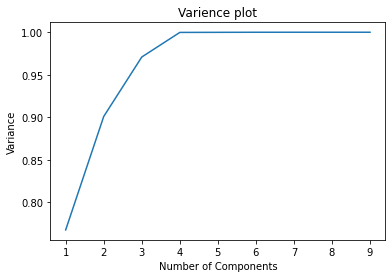

In [197]:
y_new = []
for i in range(1,len(x.columns)):
    pca = decomposition.PCA(n_components=i)
    pca = pca.fit(x_train)
    y_new.append(np.sum(pca.explained_variance_ratio_))
m = range(1,len(x.columns))
plt.plot(m,y_new)
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Varience plot')
plt.show()

In [198]:
#Train model with n =3 components
pca = decomposition.PCA(n_components=3)
pca = pca.fit(x_train)
new_data_train = pd.DataFrame(pca.transform(x_train))
new_data_test = pd.DataFrame(pca.transform(x_test))

In [199]:
DTree = DecisionTreeRegressor(min_samples_leaf = .0001)
DTree.fit(new_data_train, y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

In [200]:
y_predict=DTree.predict(new_data_test)
r2_score(y_test,y_predict)

0.7399326833655573

### Random Forest Regression

In [201]:
#Random Forest
#ts_score=[]
#for j in range(500):
#   x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=j)
#    rf=RandomForestRegressor().fit(x_train,y_train)
#    ts_score.append(rf.score(x_test,y_test))
#J= ts_score.index(np.max(ts_score))

In [202]:
#J

In [203]:
#Split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

In [204]:
#Train model with random state = 105
train_acc = []
test_acc = []
for i in range(1,100):
    print('Estimator:',i)
    RForest = RandomForestRegressor(n_estimators=i)
    RForest.fit(x_train, y_train)
    train_acc.append(r2_score(y_train,RForest.predict(x_train)))
    test_acc.append(r2_score(y_test,RForest.predict(x_test)))

Estimator: 1
Estimator: 2
Estimator: 3
Estimator: 4
Estimator: 5
Estimator: 6
Estimator: 7
Estimator: 8
Estimator: 9
Estimator: 10
Estimator: 11
Estimator: 12
Estimator: 13
Estimator: 14
Estimator: 15
Estimator: 16
Estimator: 17
Estimator: 18
Estimator: 19
Estimator: 20
Estimator: 21
Estimator: 22
Estimator: 23
Estimator: 24
Estimator: 25
Estimator: 26
Estimator: 27
Estimator: 28
Estimator: 29
Estimator: 30
Estimator: 31
Estimator: 32
Estimator: 33
Estimator: 34
Estimator: 35
Estimator: 36
Estimator: 37
Estimator: 38
Estimator: 39
Estimator: 40
Estimator: 41
Estimator: 42
Estimator: 43
Estimator: 44
Estimator: 45
Estimator: 46
Estimator: 47
Estimator: 48
Estimator: 49
Estimator: 50
Estimator: 51
Estimator: 52
Estimator: 53
Estimator: 54
Estimator: 55
Estimator: 56
Estimator: 57
Estimator: 58
Estimator: 59
Estimator: 60
Estimator: 61
Estimator: 62
Estimator: 63
Estimator: 64
Estimator: 65
Estimator: 66
Estimator: 67
Estimator: 68
Estimator: 69
Estimator: 70
Estimator: 71
Estimator: 72
E

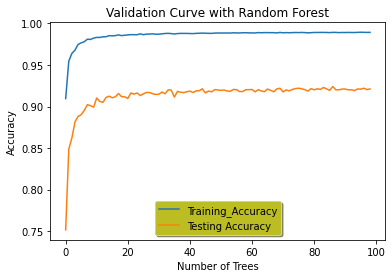

In [231]:
#Plot validation curve
fig, ax = plt.subplots()
ax.plot(train_acc,label='Training_Accuracy')
ax.plot(test_acc,label='Testing Accuracy')
plt.title('Validation Curve with Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
legend = ax.legend(loc='lower center', shadow=True, fontsize='medium')
legend.get_frame().set_facecolor('C8')
plt.show()

In [206]:
RForest = RandomForestRegressor(n_estimators=50)

In [207]:
#Train model with estimator = 50
RForest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50)

In [208]:
y_predict=RForest.predict(x_test)
r2_score(y_test,y_predict)

0.9188220894055591

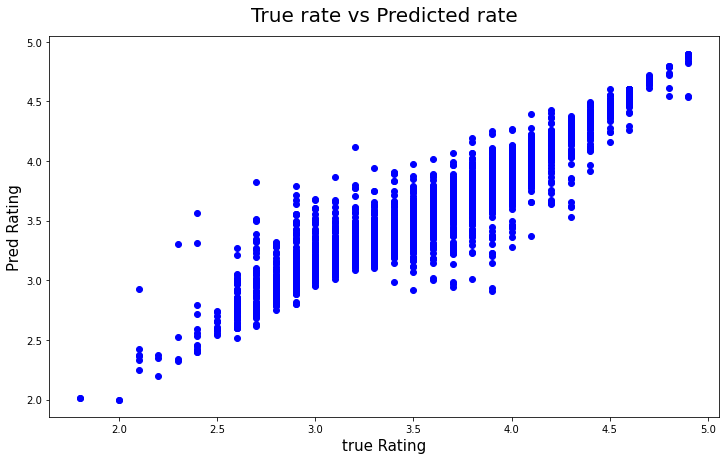

In [232]:
#Plot true vs predicted graph
plt.figure(figsize=(12,7))
preds_rf = RForest.predict(x_test)
plt.scatter(y_test,preds_rf,color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('true Rating',size = 15)
plt.ylabel('Pred Rating',size = 15)
plt.show()

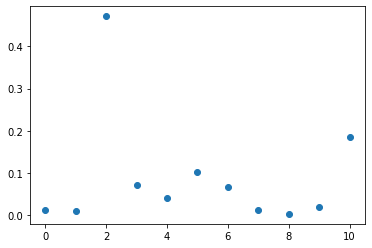

In [234]:
#Plot the important features
plt.scatter(range(len(RForest.feature_importances_)),RForest.feature_importances_)
plt.show()

In [211]:
(RForest.feature_importances_)

array([0.01594285, 0.0170289 , 0.51709152, 0.1031403 , 0.05574358,
       0.15550791, 0.09118767, 0.01511843, 0.00521838, 0.02402047])

In [212]:
list(x.columns)

['Online_Order',
 'Table_Booking',
 'Votes',
 'Location',
 'Type',
 'Cuisines',
 'Cost_for_2',
 'Menu_Item',
 'Category',
 'Area']

In [213]:
#View Important features in tabular format
Feature_imp = pd.DataFrame()
Feature_imp['Columns'] = list(x.columns)
Feature_imp['Random Forest Feature Importance'] = RForest.feature_importances_
Feature_imp_RF = Feature_imp.sort_values(by = 'Random Forest Feature Importance', ascending = False)

In [214]:
Feature_imp_RF.head(10)

,Columns,Random Forest Feature Importance
2,Votes,0.517092
5,Cuisines,0.155508
3,Location,0.103140
6,Cost_for_2,0.091188
4,Type,0.055744
9,Area,0.024020
1,Table_Booking,0.017029
0,Online_Order,0.015943
7,Menu_Item,0.015118
8,Category,0.005218


### Random Forest Regressor - PCA

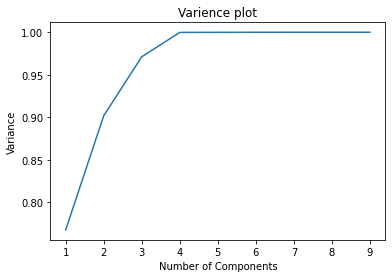

In [215]:
y_temp = []
for i in range(1,len(x.columns)):
    pca = decomposition.PCA(n_components=i)
    pca = pca.fit(x_train)
    y_temp.append(np.sum(pca.explained_variance_ratio_))
m = range(1,len(x.columns))
plt.plot(m,y_temp)
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Varience plot')
plt.show()


In [216]:
pca = decomposition.PCA(n_components=3)
pca = pca.fit(x_train)
new_data_train = pd.DataFrame(pca.transform(x_train))
new_data_test = pd.DataFrame(pca.transform(x_test))

In [217]:
RForest = RandomForestRegressor(n_estimators=50)

In [218]:
#Train model with n = 3 components
RForest.fit(new_data_train,y_train)

RandomForestRegressor(n_estimators=50)

In [219]:
y_predict=RForest.predict(new_data_test)
r2_score(y_test,y_predict)

0.8667218828374199

### Random Forest including emotion

In [220]:
#Predict the closest cluster each sample in Average emotion of review belongs to.
m = kmeans.predict(np.array(df2['Average emotion of review']).reshape(-1,1))

In [221]:
RForest = RandomForestRegressor(n_estimators=50)

In [222]:
#Add new column in df2
df2['Average Comment Emotion'] = m

In [223]:
df2.head()

,Restaurant_Name,Online_Order,Table_Booking,Ratings,Votes,Location,Type,Cuisines,Cost_for_2,Menu_Item,Category,Area,Average emotion of review,Average Comment Emotion
0,Jalsa,1,1,4.1,775,1,23,1871,800.0,8160,0,1,4.083333,1
1,Spice Elephant,1,0,4.1,787,1,23,807,800.0,8160,0,1,3.571429,1
2,San Churro Cafe,1,0,3.8,918,1,18,647,800.0,8160,0,1,3.150000,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,72,2187,300.0,8160,0,1,3.671429,1
4,Grand Village,0,0,3.8,166,4,23,1898,600.0,8160,0,1,4.000000,1


In [224]:
#Splitting data
x = df2.iloc[:,[1,2,4,5,6,7,8,9,10,11,13]]
y = df2['Ratings']

In [225]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=105)

In [226]:
#Train Model
RForest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50)

In [227]:
#Predict accuracy
y_predict=RForest.predict(x_test)
r2_score(y_test,y_predict)

0.9242685629252047

In [228]:
#Important features in Tabular format
Feature_imp = pd.DataFrame()
Feature_imp['Columns'] = list(x.columns)
Feature_imp['Random Forest Feature Importance'] = RForest.feature_importances_
Feature_imp_RF = Feature_imp.sort_values(by = 'Random Forest Feature Importance', ascending = False)

In [229]:
Feature_imp_RF.head(10)

,Columns,Random Forest Feature Importance
2,Votes,0.470972
10,Average Comment Emotion,0.184932
5,Cuisines,0.102990
3,Location,0.071733
6,Cost_for_2,0.067804
4,Type,0.040641
9,Area,0.020652
7,Menu_Item,0.012682
0,Online_Order,0.012410
1,Table_Booking,0.011446
